In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING LIBRARIES**

In [ ]:
import warnings
warnings.simplefilter("ignore", UserWarning)

import os
from tqdm import tqdm
import pickle
import scipy
import sys
import pandas as pd
import numpy as np
import IPython
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import librosa
import librosa.display
import librosa.display as lplt
from IPython.display import Image

from tensorflow import keras
from keras.models import Sequential
from keras.utils import plot_model
from IPython.display import Audio
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.feature_selection import RFECV, mutual_info_regression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
%matplotlib inline

In [ ]:
!unzip /content/drive/MyDrive/Project-SR/dataset.zip

Archive:  /content/drive/MyDrive/Project-SR/dataset.zip
  inflating: features_30_sec.csv     
  inflating: features_3_sec.csv      
  inflating: genres_original/blues/blues.00000.wav  
  inflating: genres_original/blues/blues.00001.wav  
  inflating: genres_original/blues/blues.00002.wav  
  inflating: genres_original/blues/blues.00003.wav  
  inflating: genres_original/blues/blues.00004.wav  
  inflating: genres_original/blues/blues.00005.wav  
  inflating: genres_original/blues/blues.00006.wav  
  inflating: genres_original/blues/blues.00007.wav  
  inflating: genres_original/blues/blues.00008.wav  
  inflating: genres_original/blues/blues.00009.wav  
  inflating: genres_original/blues/blues.00010.wav  
  inflating: genres_original/blues/blues.00011.wav  
  inflating: genres_original/blues/blues.00012.wav  
  inflating: genres_original/blues/blues.00013.wav  
  inflating: genres_original/blues/blues.00014.wav  
  inflating: genres_original/blues/blues.00015.wav  
  inflating: genres_

**LOADING & PREPROCESSING THE DATA**

In [ ]:
#Reading the csv file
data = pd.read_csv("/content/features_3_sec.csv")

In [ ]:
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
data.shape

(9990, 60)

In [ ]:
data.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
datas = data.drop(labels='filename',axis=1)

In [ ]:
#audio file
audio = "/content/genres_original/rock/rock.00000.wav"
#Load & decode the audio as a time series, where sr represents the sampling rate
data , sr = librosa.load(audio)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio, sr=45600)

(array([-0.03225994, -0.04964922, -0.05456545, ...,  0.11482246,
         0.12490658,  0.06926159], dtype=float32),
 45600)

In [ ]:
#Playing the audio within the notebook
IPython.display.Audio(data, rate=sr)

**AUDIO VISUALIZATION**

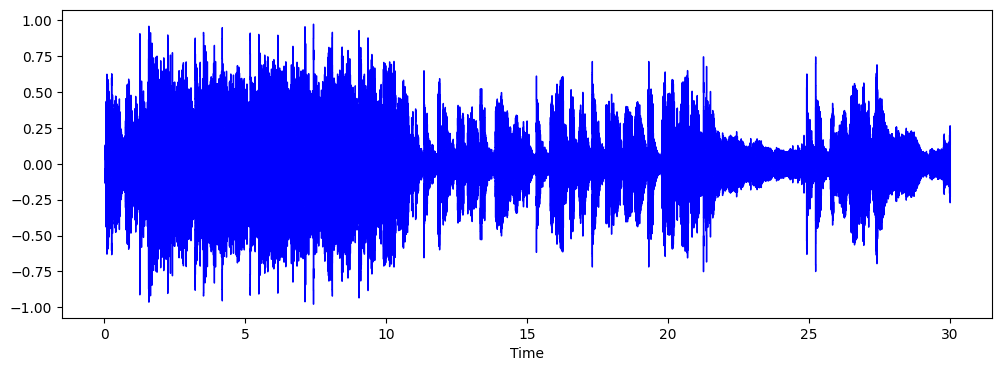

In [ ]:
#Plotting the raw wave file to quickly scan the audio data & contrast which genres might be more similar.

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color = "Blue")
plt.show()

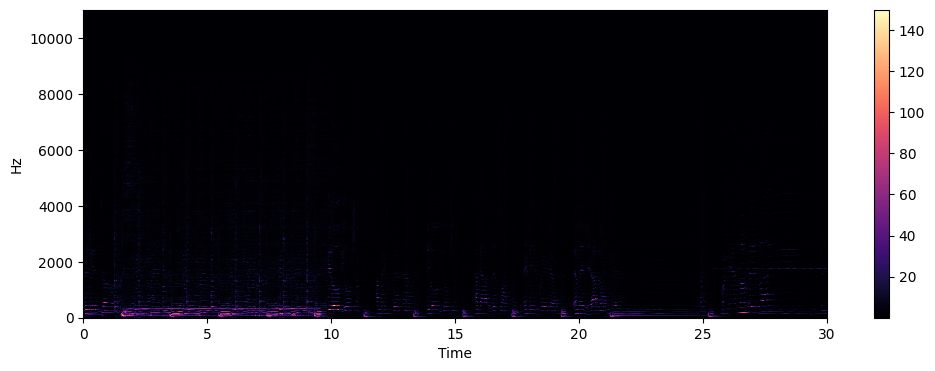

In [ ]:
#Spectrogram
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12,4))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


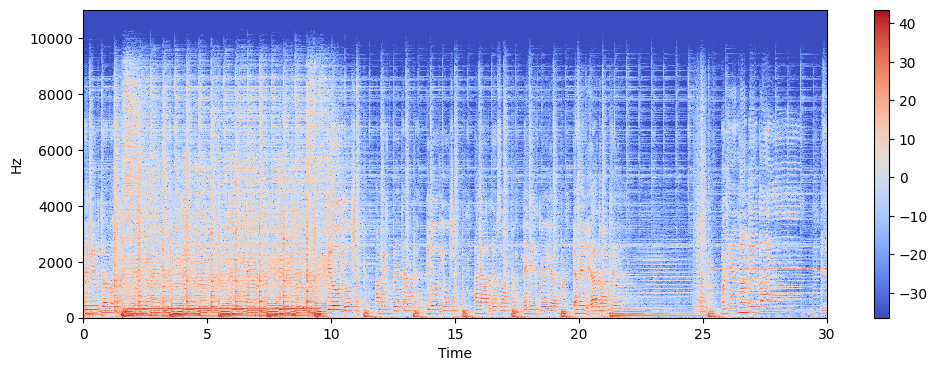

In [ ]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

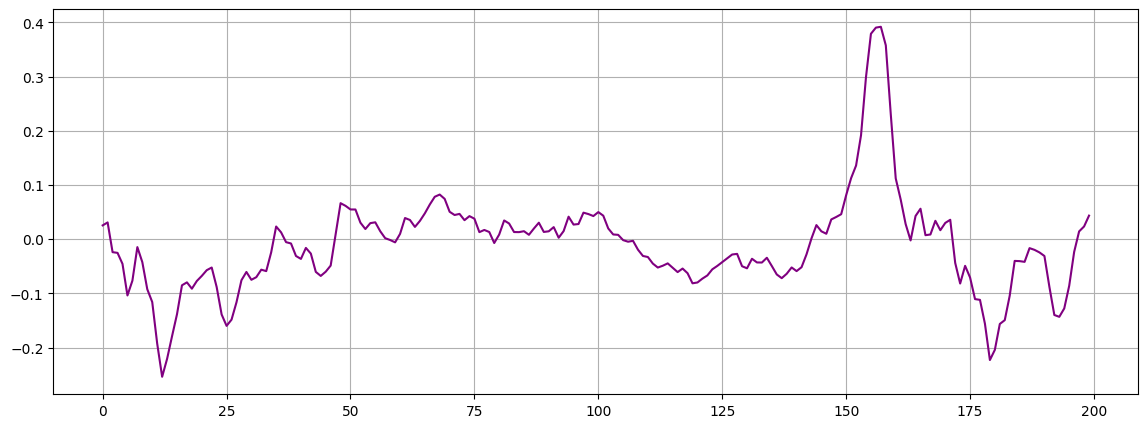

In [ ]:
# The rate at which zero-crossings occur is a simple measure of the frequency content of a signal.
# Zero crossing is said to occur if successive samples have different algebric signs.
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color='Purple')
plt.grid()

In [ ]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print("The number of zero crossings is:",sum(zero_cross_rate))

The number of zero crossings is: 14


**Feature Scaling**

In [ ]:
#To convert categorical data into model-understandable numerica data
class_list = datas.iloc[:, -1]
convertor = LabelEncoder()

In [ ]:
#Fitting the label encoder & return encoded labels
y = convertor.fit_transform(class_list)

In [ ]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
print(datas.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [ ]:
fit = StandardScaler()
X = fit.fit_transform(np.array(datas.iloc[:, :-1], dtype = float))

**Splitting Data**

In [ ]:
# Splitting dataset to 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_1, X_val, y_test_1, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
len(y_train)

7992

In [ ]:
len(y_test_1)

999

In [ ]:
len(y_val)

999

In [ ]:
len(y_test)

1998

In [ ]:
# The loss is calculated using sparse_categorical_crossentropy function
def trainModel(model, epochs, optimizer):
  batch_size = 64
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics='accuracy'
  )
  return model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs,
                    batch_size=batch_size)

In [ ]:
# Plotting the curves
def plotValidate(history):
  print("Validation Accuracy",max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))
  plt.show()

In [ ]:
model = XGBClassifier(n_estimators=1000)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_test = model.predict(X_test)
target_names = sorted(set(y))

print(f'Testing accuracy: {accuracy_score(y_test,y_pred_test)}')
print(f'Testing:\n {classification_report(y_test, y_pred_test, labels=target_names)}')

Testing accuracy: 0.9159159159159159
Testing:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       208
           1       0.93      0.96      0.95       203
           2       0.83      0.90      0.87       186
           3       0.91      0.89      0.90       199
           4       0.96      0.90      0.93       218
           5       0.88      0.92      0.90       192
           6       0.94      0.96      0.95       204
           7       0.95      0.96      0.95       180
           8       0.95      0.93      0.94       211
           9       0.92      0.86      0.89       197

    accuracy                           0.92      1998
   macro avg       0.92      0.92      0.92      1998
weighted avg       0.92      0.92      0.92      1998



<Axes: >

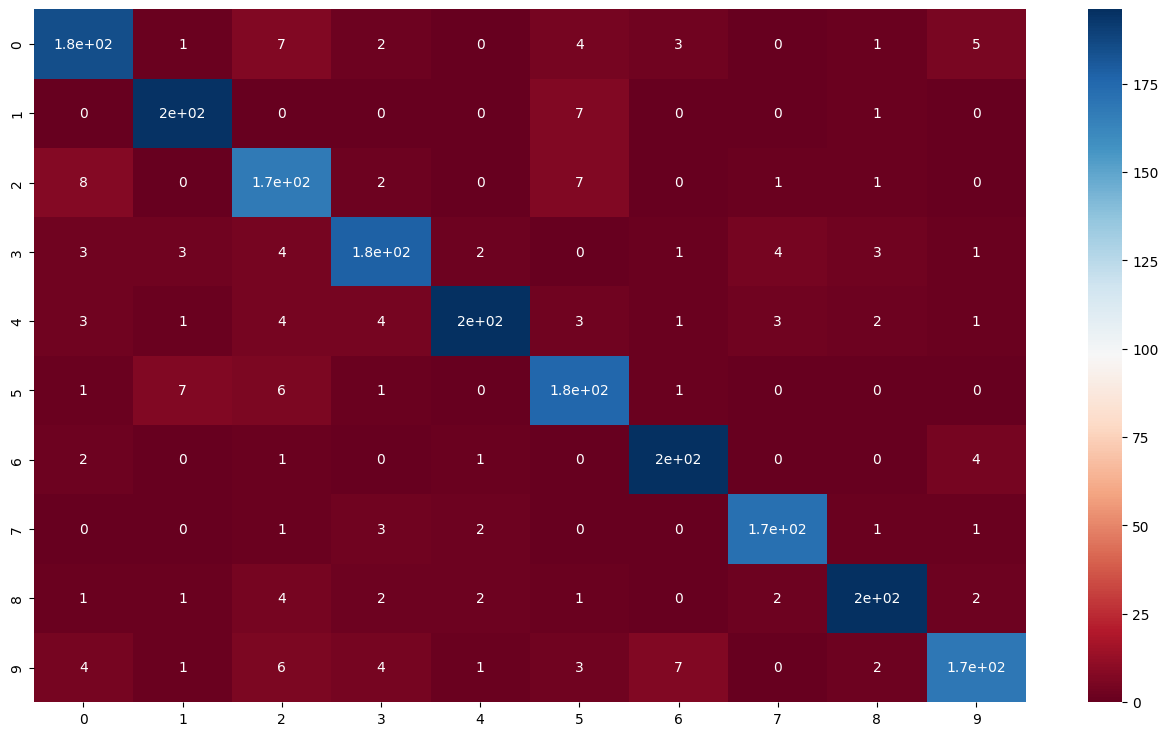

In [ ]:
#Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (16, 9))
sns.heatmap(conf_mat,cmap="RdBu", annot=True, xticklabels = target_names, yticklabels = target_names )

**Random Forest**

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_test = model.predict(X_test)
target_names = sorted(set(y))

print(f'Testing accuracy: {accuracy_score(y_test,y_pred_test)}')
print(f'Testing:\n {classification_report(y_test, y_pred_test, labels=target_names)}')

Testing accuracy: 0.8788788788788788
Testing:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       208
           1       0.92      0.97      0.94       203
           2       0.78      0.82      0.80       186
           3       0.86      0.86      0.86       199
           4       0.93      0.89      0.91       218
           5       0.84      0.89      0.86       192
           6       0.88      0.97      0.92       204
           7       0.90      0.94      0.92       180
           8       0.91      0.88      0.89       211
           9       0.89      0.72      0.79       197

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998



<Axes: >

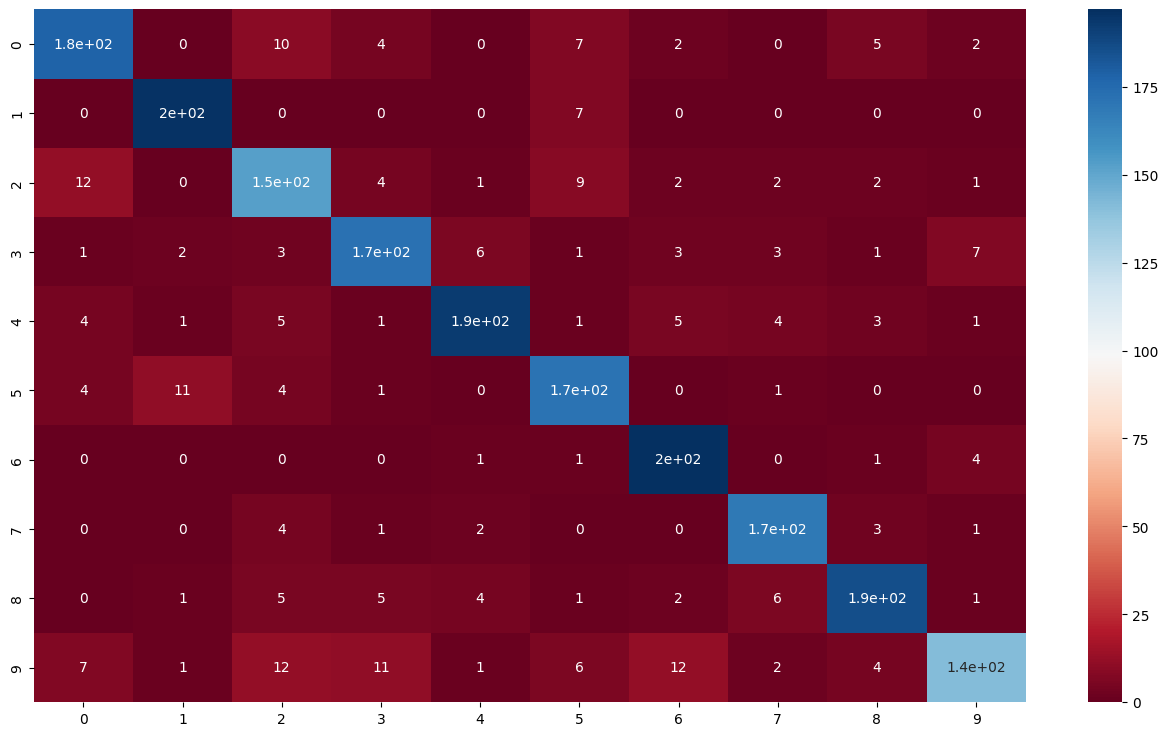

In [ ]:
#Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (16, 9))
sns.heatmap(conf_mat,cmap="RdBu", annot=True, xticklabels = target_names, yticklabels = target_names )

**Fully Connected Neural Network or MLP (Multi Layer Perceptron)**




In [ ]:
model = keras.models.Sequential([
  keras.layers.Dense(1024, activation="relu", input_shape=(X_train.shape[1],)),
  keras.layers.Dropout(0.2),

  keras.layers.Dense(512,activation="relu"),
  keras.layers.Dropout(0.2),

  keras.layers.Dense(256,activation="relu"),
  keras.layers.Dropout(0.2),

  keras.layers.Dense(128,activation="relu"),
  keras.layers.Dropout(0.2),

  keras.layers.Dense(10, activation="softmax"),
])
print(model.summary())
model_history = trainModel(model=model, epochs=100, optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              60416     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_1, y_test_1, batch_size=64)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

16/16 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.9269
The test loss is : 0.40758776664733887

The test Accuracy is : 92.69269108772278


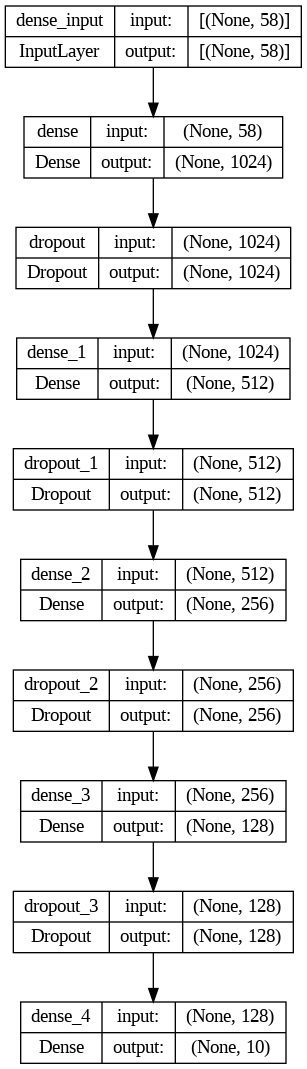

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='ann_model.png')
Image('ann_model.png')

Validation Accuracy 0.9509509801864624


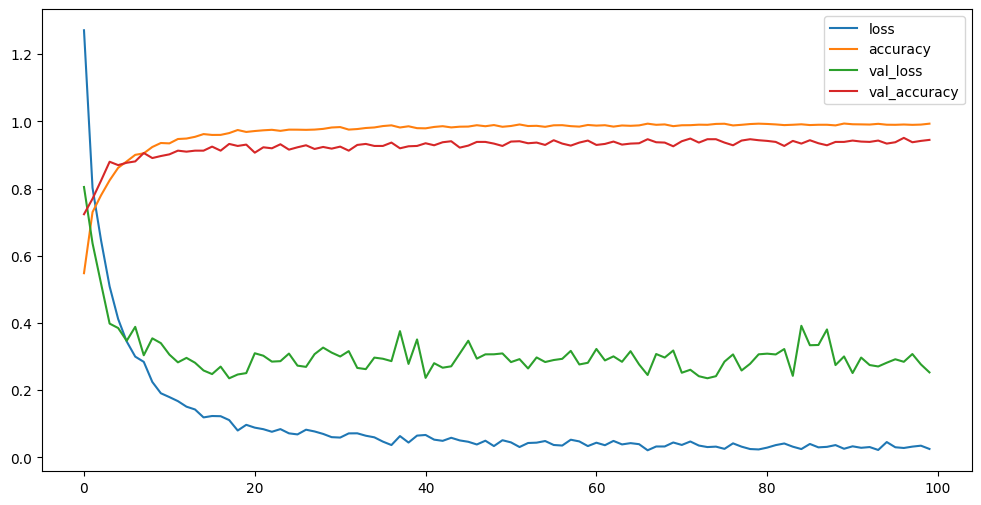

In [ ]:
#Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

In [ ]:
y_pred = model.predict(X_test_1)
y_pred = tf.argmax(y_pred, axis = 1)

print(y_pred)

genres_path = '/content/genres_original'

folder_names = [folder for folder in os.listdir(genres_path)
                if os.path.isdir(os.path.join(genres_path, folder))]

# Convert the list to a NumPy array
label_names = np.array(folder_names)

# Print the label names
print('Label names: ', label_names)

32/32 [==============================] - 0s 3ms/step
tf.Tensor(
[3 6 9 4 5 4 7 6 2 0 8 1 8 8 9 3 7 8 0 4 1 6 3 3 0 6 2 3 7 9 2 3 0 7 3 3 8
 0 9 8 4 0 8 3 2 4 8 8 9 9 2 7 4 6 3 4 9 2 4 7 2 6 3 4 8 8 3 9 4 7 8 6 3 5
 6 3 4 8 5 2 2 1 1 6 0 4 9 1 0 0 3 8 6 3 5 9 0 2 5 5 3 1 3 0 5 3 8 4 8 8 8
 0 9 5 5 1 5 3 4 9 8 1 4 9 8 0 1 1 5 3 4 1 6 4 7 0 1 8 1 2 8 3 7 6 1 8 0 2
 3 2 2 4 2 3 3 5 1 3 0 0 3 0 6 6 2 1 0 4 1 5 5 1 6 0 0 9 4 4 0 6 1 9 4 3 8
 6 5 5 1 5 3 0 5 0 7 6 1 7 6 1 2 8 9 7 1 2 3 8 6 3 6 9 8 0 3 3 0 9 1 3 1 9
 0 5 7 8 2 5 6 4 9 5 5 8 6 7 2 6 7 3 5 2 2 0 7 0 5 6 9 7 3 4 5 7 1 0 2 5 1
 8 6 3 4 4 0 1 8 7 6 5 6 4 7 4 4 5 7 1 1 2 7 5 1 7 3 6 4 9 0 5 8 0 6 5 5 5
 4 1 0 1 0 6 0 5 8 5 8 3 1 9 9 4 7 6 6 3 7 3 0 2 6 8 4 7 0 1 0 2 0 0 4 6 7
 8 6 0 9 5 2 5 4 7 8 1 0 1 0 1 2 0 4 0 6 7 7 0 2 0 8 9 5 8 4 0 0 9 8 2 7 8
 9 2 4 7 2 0 3 6 6 8 0 7 5 5 5 6 4 1 8 4 9 9 0 0 6 6 4 4 9 2 9 5 7 1 2 4 6
 1 1 3 6 0 6 9 3 8 8 2 1 0 7 1 7 7 6 1 4 6 4 4 4 7 1 0 0 4 9 6 9 3 1 7 7 0
 5 8 0 9 6 6 6 8 0 4 4 9 6 3 1 9 2 0

In [ ]:
def convert_to_labels(labels):
    if isinstance(labels, tf.Tensor):
        return [label_names[label.numpy()] for label in labels]
    else:
        return labels

y_pred = convert_to_labels(y_pred)
y_true = convert_to_labels(tf.concat([tf.reshape(label, (1,)) for label in y_test_1], axis=0))

for index, (pred_label, true_label) in enumerate(zip (y_pred, y_true)):
    print(f'Prediction: {pred_label} | Real: {true_label}')

Prediction: country | Real: country
Prediction: reggae | Real: reggae
Prediction: metal | Real: metal
Prediction: pop | Real: metal
Prediction: hiphop | Real: hiphop
Prediction: pop | Real: pop
Prediction: blues | Real: blues
Prediction: reggae | Real: reggae
Prediction: rock | Real: rock
Prediction: classical | Real: classical
Prediction: disco | Real: disco
Prediction: jazz | Real: jazz
Prediction: disco | Real: disco
Prediction: disco | Real: disco
Prediction: metal | Real: metal
Prediction: country | Real: country
Prediction: blues | Real: blues
Prediction: disco | Real: disco
Prediction: classical | Real: classical
Prediction: pop | Real: pop
Prediction: jazz | Real: disco
Prediction: reggae | Real: reggae
Prediction: country | Real: country
Prediction: country | Real: country
Prediction: classical | Real: classical
Prediction: reggae | Real: reggae
Prediction: rock | Real: pop
Prediction: country | Real: country
Prediction: blues | Real: blues
Prediction: metal | Real: metal
Pred

<Axes: >

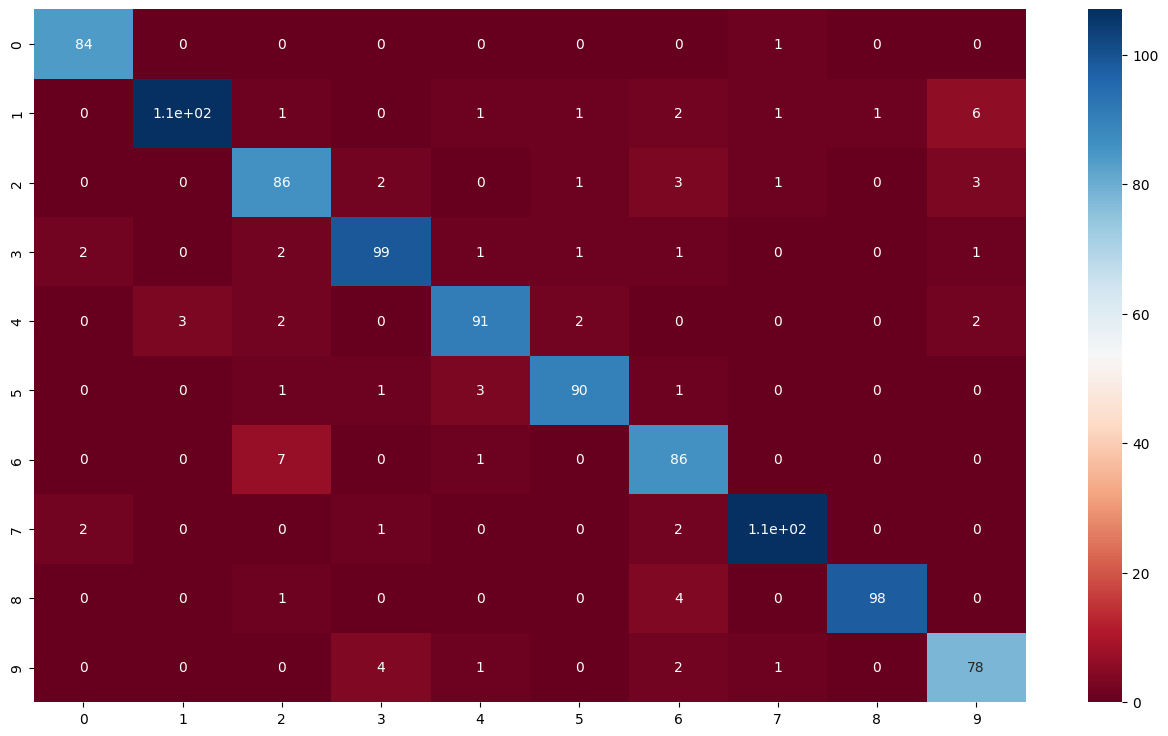

In [ ]:
#Confusion matrix
conf_mat = confusion_matrix(y_pred, y_true)
plt.figure(figsize = (16, 9))
sns.heatmap(conf_mat,cmap="RdBu", annot=True, xticklabels = target_names, yticklabels = target_names )

In [ ]:
print(f'Testing:\n {classification_report(y_pred, y_true)}')
print(f'Testing:\n {f1_score(y_pred, y_true, average="micro")}')

Testing:
               precision    recall  f1-score   support

       blues       0.95      0.99      0.97        85
   classical       0.97      0.89      0.93       120
     country       0.86      0.90      0.88        96
       disco       0.93      0.93      0.93       107
      hiphop       0.93      0.91      0.92       100
        jazz       0.95      0.94      0.94        96
       metal       0.85      0.91      0.88        94
         pop       0.96      0.96      0.96       112
      reggae       0.99      0.95      0.97       103
        rock       0.87      0.91      0.89        86

    accuracy                           0.93       999
   macro avg       0.93      0.93      0.93       999
weighted avg       0.93      0.93      0.93       999

Testing:
 0.9269269269269269


**CNN-LSTM Architechture**

In [ ]:
lstm_model = keras.models.Sequential([
  keras.layers.Input(shape=(58, 1,)),

  keras.layers.Conv1D(filters=64, kernel_size=3, strides=2, padding='same'),
  keras.layers.Activation('relu'),
  keras.layers.Conv1D(filters=64, kernel_size=3, strides=2, padding='same'),
  keras.layers.Activation('relu'),
  keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same'),

  keras.layers.Conv1D(filters=128, kernel_size=3, strides=2, padding='same'),
  keras.layers.Activation('relu'),
  keras.layers.Conv1D(filters=128, kernel_size=3, strides=2, padding='same'),
  keras.layers.Activation('relu'),
  keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same'),

  keras.layers.Conv1D(filters=256, kernel_size=3, strides=2, padding='same'),
  keras.layers.Activation('relu'),
  keras.layers.Conv1D(filters=256, kernel_size=3, strides=2, padding='same'),
  keras.layers.Activation('relu'),
  keras.layers.Conv1D(filters=256, kernel_size=3, strides=2, padding='same'),
  keras.layers.Activation('relu'),

  keras.layers.LSTM(units=256),

  keras.layers.Dense(units=10, activation='softmax'),
])
print(lstm_model.summary())
model_history = trainModel(model=lstm_model, epochs=100, optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 64)            256       
                                                                 
 activation (Activation)     (None, 29, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            12352     
                                                                 
 activation_1 (Activation)   (None, 15, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 64)             0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 128)            24704     
                                                      

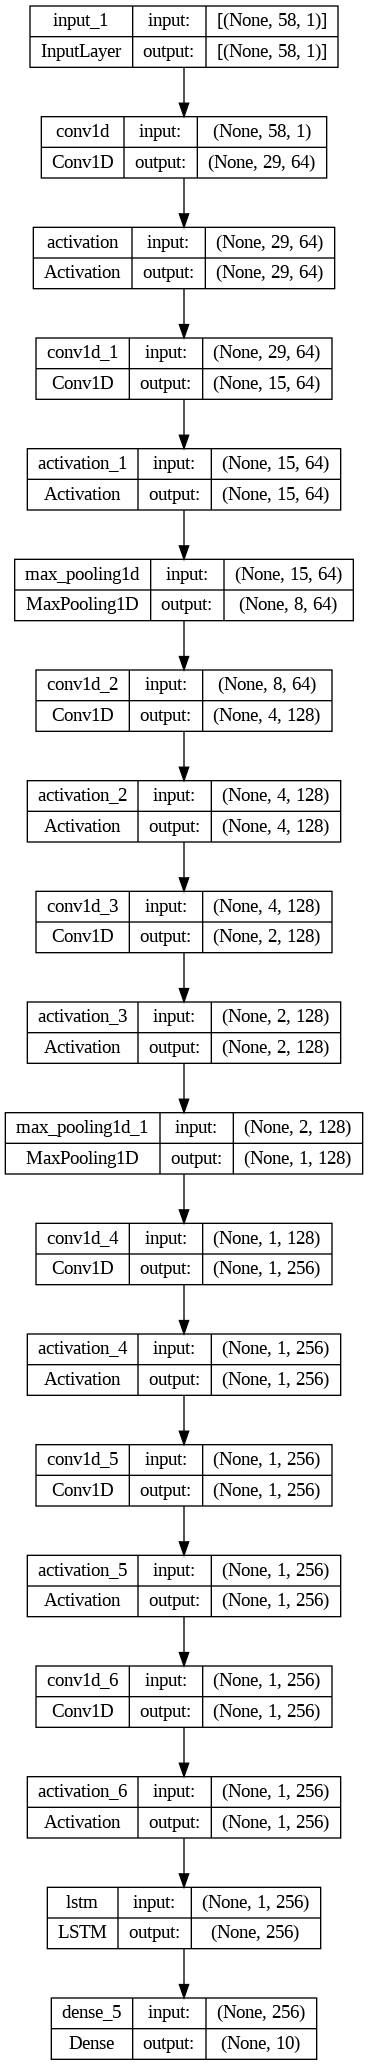

In [ ]:
plot_model(lstm_model, show_shapes=True, show_layer_names=True, to_file='lstm_model.png')
Image('lstm_model.png')

In [ ]:
test_loss, test_accuracy = lstm_model.evaluate(X_test_1, y_test_1, batch_size=64)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

16/16 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.8959
The test loss is : 0.6729874014854431

The test Accuracy is : 89.58958983421326


Validation Accuracy 0.8958958983421326


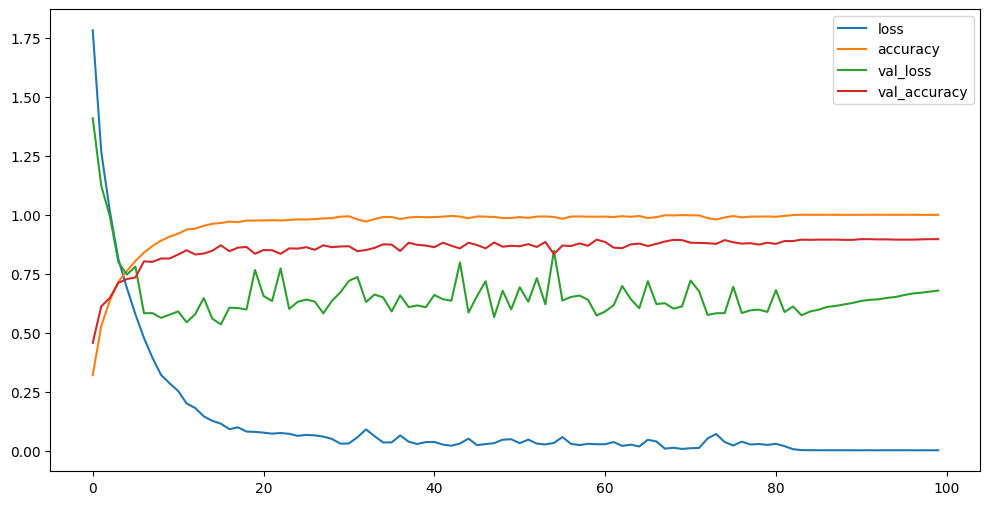

In [ ]:
#Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

In [ ]:
y_pred = lstm_model.predict(X_test_1)
y_pred = tf.argmax(y_pred, axis = 1)

print(y_pred)

genres_path = '/content/genres_original'

folder_names = [folder for folder in os.listdir(genres_path)
                if os.path.isdir(os.path.join(genres_path, folder))]

# Convert the list to a NumPy array
label_names = np.array(folder_names)

# Print the label names
print('Label names: ', label_names)

32/32 [==============================] - 1s 7ms/step
tf.Tensor(
[3 6 9 3 5 4 7 6 2 0 2 1 8 8 9 5 7 8 0 4 5 6 3 3 0 6 4 3 7 9 2 3 0 7 3 3 8
 0 6 8 4 0 8 3 0 4 8 8 9 9 2 7 4 6 3 4 9 9 4 7 2 6 3 4 8 8 3 9 4 7 4 6 6 5
 6 3 4 8 1 2 2 1 1 6 0 4 9 9 0 0 3 8 6 3 5 9 0 2 5 5 3 1 3 0 5 7 8 4 7 8 8
 8 9 1 5 1 5 9 4 9 8 1 0 3 8 0 1 1 5 3 4 1 6 8 7 5 1 8 1 2 8 3 7 6 1 5 0 2
 0 2 2 4 8 3 3 5 1 3 0 0 3 0 6 6 2 1 0 4 1 5 3 1 6 0 0 9 4 4 0 6 1 9 4 3 8
 6 5 5 1 5 6 0 5 0 7 6 1 7 6 1 2 8 9 7 1 5 3 8 6 3 6 3 8 0 3 3 0 9 1 3 1 9
 0 5 7 8 2 5 6 4 9 5 5 8 6 7 2 6 7 3 5 2 2 0 7 0 5 6 9 7 3 4 2 7 1 5 2 5 1
 8 6 9 4 4 0 1 8 7 6 5 6 4 7 4 4 5 7 1 1 2 7 5 1 7 3 6 4 9 0 5 8 0 6 5 5 5
 4 1 0 1 0 6 4 5 2 5 8 3 5 3 9 4 7 6 6 3 7 3 0 9 9 8 4 7 0 1 0 2 0 0 4 6 7
 8 6 0 9 5 0 5 4 7 8 1 0 1 0 1 2 0 4 8 6 7 7 0 2 0 8 9 5 4 4 0 0 9 8 2 9 8
 9 2 4 7 2 0 3 6 6 8 0 7 5 5 2 6 4 1 8 4 9 9 0 0 0 6 7 4 9 2 9 5 7 1 7 4 6
 1 1 9 6 5 6 9 3 8 8 2 1 0 7 1 4 7 6 1 4 6 4 4 4 7 1 0 0 4 9 6 9 3 1 7 7 0
 0 9 0 9 6 6 6 8 2 4 4 9 6 3 1 9 2 9

In [ ]:
def convert_to_labels(labels):
    if isinstance(labels, tf.Tensor):
        return [label_names[label.numpy()] for label in labels]
    else:
        return labels

y_pred = convert_to_labels(y_pred)
y_true = convert_to_labels(tf.concat([tf.reshape(label, (1,)) for label in y_test_1], axis=0))

for index, (pred_label, true_label) in enumerate(zip (y_pred, y_true)):
    print(f'Prediction: {pred_label} | Real: {true_label}')

Prediction: country | Real: country
Prediction: reggae | Real: reggae
Prediction: metal | Real: metal
Prediction: country | Real: metal
Prediction: hiphop | Real: hiphop
Prediction: pop | Real: pop
Prediction: blues | Real: blues
Prediction: reggae | Real: reggae
Prediction: rock | Real: rock
Prediction: classical | Real: classical
Prediction: rock | Real: disco
Prediction: jazz | Real: jazz
Prediction: disco | Real: disco
Prediction: disco | Real: disco
Prediction: metal | Real: metal
Prediction: hiphop | Real: country
Prediction: blues | Real: blues
Prediction: disco | Real: disco
Prediction: classical | Real: classical
Prediction: pop | Real: pop
Prediction: hiphop | Real: disco
Prediction: reggae | Real: reggae
Prediction: country | Real: country
Prediction: country | Real: country
Prediction: classical | Real: classical
Prediction: reggae | Real: reggae
Prediction: pop | Real: pop
Prediction: country | Real: country
Prediction: blues | Real: blues
Prediction: metal | Real: metal
P

<Axes: >

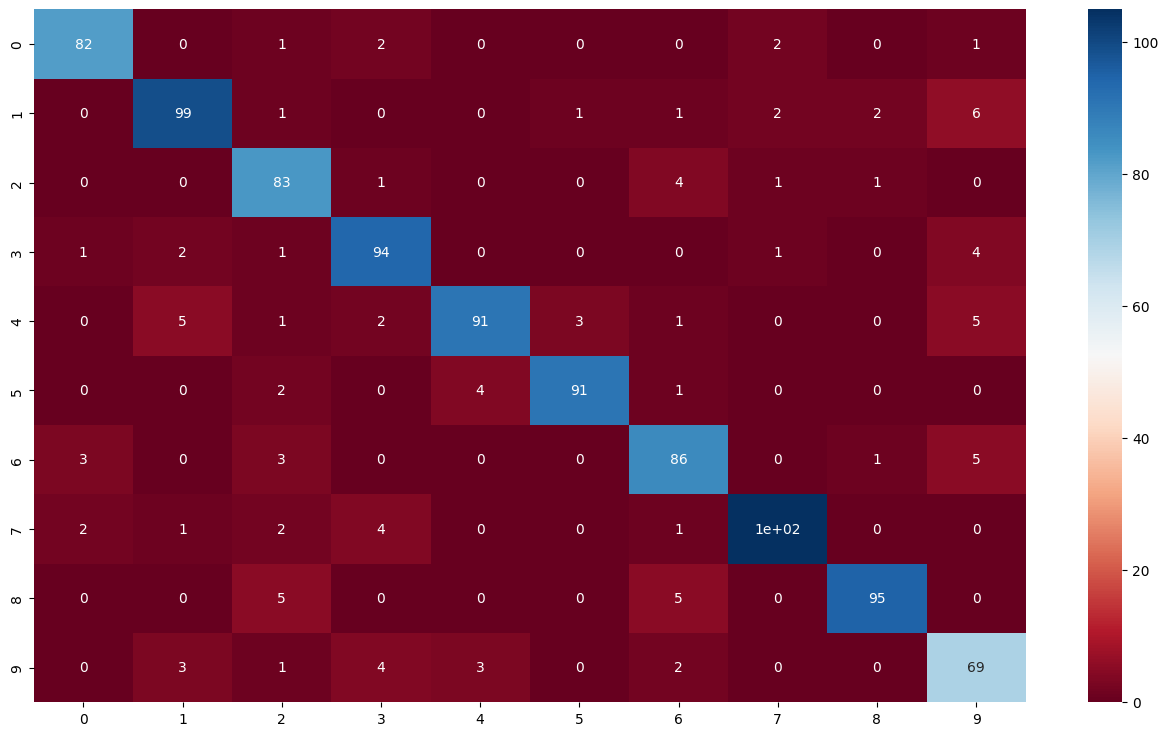

In [ ]:
#Confusion matrix
conf_mat = confusion_matrix(y_pred, y_true)
plt.figure(figsize = (16, 9))
sns.heatmap(conf_mat,cmap="RdBu", annot=True, xticklabels = target_names, yticklabels = target_names )

In [ ]:
print(f'Testing:\n {classification_report(y_pred, y_true)}')
print(f'Testing:\n {f1_score(y_pred, y_true, average="micro")}')

Testing:
               precision    recall  f1-score   support

       blues       0.93      0.93      0.93        88
   classical       0.90      0.88      0.89       112
     country       0.83      0.92      0.87        90
       disco       0.88      0.91      0.90       103
      hiphop       0.93      0.84      0.88       108
        jazz       0.96      0.93      0.94        98
       metal       0.85      0.88      0.86        98
         pop       0.95      0.91      0.93       115
      reggae       0.96      0.90      0.93       105
        rock       0.77      0.84      0.80        82

    accuracy                           0.90       999
   macro avg       0.90      0.90      0.89       999
weighted avg       0.90      0.90      0.90       999

Testing:
 0.8958958958958959


**Recommender System Using Cosine Similarity**

In [ ]:
data = pd.read_csv('/content/features_30_sec.csv', index_col='filename')

# Extract labels
labels = data[['label']]

# Drop labels from original dataframe
data = data.drop(columns=['length','label'])
data.head()

data_scaled=fit.fit_transform(data)
print('Scaled data type:', type(data_scaled))

Scaled data type: <class 'numpy.ndarray'>


In [ ]:
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)

# Convert into a dataframe and then set the row index and column names as labels
sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names.head()

Similarity shape: (1000, 1000)


filename         blues.00000.wav  blues.00001.wav  blues.00002.wav  \
filename                                                             
blues.00000.wav         1.000000         0.049231         0.589618   
blues.00001.wav         0.049231         1.000000        -0.096834   
blues.00002.wav         0.589618        -0.096834         1.000000   
blues.00003.wav         0.284862         0.520903         0.210411   
blues.00004.wav         0.025561         0.080749         0.400266   

filename         blues.00003.wav  blues.00004.wav  blues.00005.wav  \
filename                                                             
blues.00000.wav         0.284862         0.025561        -0.346688   
blues.00001.wav         0.520903         0.080749         0.307856   
blues.00002.wav         0.210411         0.400266        -0.082019   
blues.00003.wav         1.000000         0.126437         0.134796   
blues.00004.wav         0.126437         1.000000         0.556066   

filename         blues.00006.wav  blues.00007.wav  blues.00008.wav  \
filename                                                             
blues.00000.wav        -0.219483        -0.167626         0.641877   
blues.00001.wav         0.318286         0.415258         0.120649   
blues.00002.wav        -0.028061         0.104446         0.468113   
blues.00003.wav         0.300746         0.324566         0.352758   
blues.00004.wav         0.482195         0.623455         0.029703   

filename         blues.00009.wav  ...  rock.00090.wav  rock.00091.wav  \
filename                          ...                                   
blues.00000.wav        -0.097889  ...       -0.082829        0.546169   
blues.00001.wav         0.404168  ...       -0.098111       -0.325126   
blues.00002.wav        -0.132532  ...       -0.032408        0.561074   
blues.00003.wav         0.295184  ...       -0.320107       -0.206516   
blues.00004.wav         0.471657  ...        0.087605        0.017366   

filename         rock.00092.wav  rock.00093.wav  rock.00094.wav  \
filename                                                          
blues.00000.wav        0.578558        0.662590        0.571629   
blues.00001.wav       -0.370792       -0.191698       -0.330834   
blues.00002.wav        0.590779        0.583293        0.514537   
blues.00003.wav       -0.151132        0.041986       -0.172515   
blues.00004.wav        0.138035        0.104684       -0.034594   

filename         rock.00095.wav  rock.00096.wav  rock.00097.wav  \
filename                                                          
blues.00000.wav        0.610942        0.640835        0.496294   
blues.00001.wav       -0.077301       -0.222119       -0.302573   
blues.00002.wav        0.495707        0.566837        0.589983   
blues.00003.wav       -0.000287        0.020515       -0.107821   
blues.00004.wav        0.063454        0.063546        0.172944   

filename         rock.00098.wav  rock.00099.wav  
filename                                         
blues.00000.wav        0.284958        0.304098  
blues.00001.wav        0.499562        0.311723  
blues.00002.wav        0.216378        0.321069  
blues.00003.wav        0.502279        0.183210  
blues.00004.wav        0.153192        0.061785  

[5 rows x 1000 columns]

In [ ]:
def find_similar_songs(name):
    # Find songs most similar to another song
    series = sim_df_names[name].sort_values(ascending = False)

    # Remove cosine similarity == 1 (songs will always have the best match with themselves)
    series = series.drop(name)

    # Display the 5 top matches
    print("\n*******\nSimilar songs to ", name)
    print(series.head(5))

In [ ]:
find_similar_songs('rock.00023.wav')

Audio('/content/genres_original/rock/rock.00023.wav')


*******
Similar songs to  rock.00023.wav
filename
rock.00081.wav       0.709757
country.00053.wav    0.669555
rock.00080.wav       0.645604
country.00080.wav    0.643495
disco.00087.wav      0.643152
Name: rock.00023.wav, dtype: float64
